# **Sentiment analysis for the financial news dataset**

# **Step-By-Step Implementation of N-Grams **

In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

plt.style.use(style='seaborn')
%matplotlib inline

<ipython-input-10-ed6a1678a04a>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style='seaborn')


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




Step 1: Explore the Dataset
We are using sentiment analysis for the financial news dataset. The sentiments are from the perspective of retail investors. It is an open-source Kaggle dataset. Download it from [here](https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news)

When you download the dataset from Kaggle directly, you will notice that the columns are nameless!Named them later and updated them in the all-data.csv file before reading it using pandas. Don't miss this Step

In [12]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Labs_MSc/all-data.csv',encoding = "ISO-8859-1")
df.head()

,Sentiment,News Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4846 non-null   object
 1   News Headline  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


**isna()** method checks whether the objects of a Dataframe or a Series contain missing or null values (NA, NaN) and returns a new object with the same shape as the original but with boolean values True or False as the elements. True indicates the presence of null or missing values and False indicates otherwise.

In [5]:
df.isna().sum()

neutral                                                                                                                            0
According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .    0
dtype: int64

In [14]:
df['Sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64

**What did we understand from the dataset?**

The dataset includes three categories of sentiments:

Neutral
Positive
Negative
Out of 4846 sentiments, 2879 have been found to be neutral, 1363 positive, and the rest negative.


# **Step 2: Feature Extraction**
Objective is to predict the sentiment of a given news headline. Obviously, the ‘News Headline’ column is our only feature, and the ‘Sentiment’ column is our target variable.

In [15]:
y=df['Sentiment'].values
y.shape

(4846,)

In [16]:
x=df['News Headline'].values
x.shape

(4846,)


What did you understand from the output?

Outputs return a shape of (4846,) which means 4846 rows and 1 column as we have 4846 rows of data and just 1 feature and a target for x and y, respectively.



# **Step 3: Train-Test Split**
In any machine learning, deep learning, or NLP(Natural Language Processing) task, splitting the data into train and test is indeed a highly crucial step. The train_test_split() method provided by sklearn is widely used for the same.

split the data: 60% for the train and the rest 40% for the test. I had started with 20% for the test.

This split is identified by experiential process!

In [17]:
from sklearn.model_selection import train_test_split

On executing the codes below, you will observe that 2907 rows have been considered as train data, and the rest of the 1939 rows have been considered as test data.

In [18]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)

In [19]:
x_train.shape

(2907,)

In [20]:
y_train.shape

(2907,)

In [21]:
x_test.shape

(1939,)

In [22]:
y_test.shape

(1939,)

In [23]:
x_train

array(["17 March 2011 - Goldman Sachs estimates that there are negative prospects for the Norwegian mobile operations of Norway 's Telenor ASA OSL : TEL and Sweden 's TeliaSonera AB STO : TLSN in the short term .",
       'Operating cash flow after investments totalled EUR 61.3 mn compared to EUR 75.3 mn in the corresponding period in 2007 .',
       'Nokia was up 0.12 pct to 16.70 eur after kicking off the morning in negative territory .',
       ..., 'The company did not distribute a dividend in 2005 .',
       'To showcase our end-to-end capabilities at the Mobile World Congress , we arranged an internal MeeGo application development competition to entice developers to create new applications .',
       'The Insolvency Act regulates the amount of debt that borrowers are permitted to write off .'],
      dtype=object)

In the following steps,we convert these NumPy arrays to Pandas data frames and thus create two data frames, namely,df_train and df_test. The former is created by concatenating x_train and y_train arrays. The latter data frame is created by concatenating x_test and y_test arrays. This is necessary to count the number of positive, negative, and neutral sentiments in both train and test datasets

In [24]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})

df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
#Concatenation of df1 and df2
df_train=pd.concat([df1,df2],axis=1)

df_train.head()

,news,sentiment
0,17 March 2011 - Goldman Sachs estimates that t...,negative
1,Operating cash flow after investments totalled...,negative
2,Nokia was up 0.12 pct to 16.70 eur after kicki...,positive
3,Affecto has helped SKAT to set up the platform...,neutral
4,Agricultural newspaper Maaseudun Tulevaisuus h...,negative


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       2907 non-null   object
 1   sentiment  2907 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


In [26]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})

df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
#Concatenation of df3 and df4
df_test=pd.concat([df3,df4],axis=1)

df_test.head()

,news,sentiment
0,According to Deputy MD Pekka Silvennoinen the ...,negative
1,Ruukki forecast a 15-20 % annual sales growth ...,negative
2,Operating profit margin increased from 11.2 % ...,positive
3,The objective of the St. Petersburg office is ...,neutral
4,The reductions will be concluded by autumn 2010 .,negative


In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       1939 non-null   object
 1   sentiment  2907 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


## **Step 4: Basic Pre-Processing of Train and Test Data**

# We are doing a simple process by for pre-processing our text data, we will **remove punctuation**s in train and test data for the ‘news’ column using punctuation provided by the string library.

In [29]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""
  for i in text:
    if i not in string.punctuation:
      ans+=i
  return ans

#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))


In [31]:
df_train.head()
#punctuations are removed from news column in train dataset

,news,sentiment
0,17 March 2011 Goldman Sachs estimates that th...,negative
1,Operating cash flow after investments totalled...,negative
2,Nokia was up 012 pct to 1670 eur after kicking...,positive
3,Affecto has helped SKAT to set up the platform...,neutral
4,Agricultural newspaper Maaseudun Tulevaisuus h...,negative


Compare the above output with the previous output of df_train. You can observe that punctuations have been successfully removed from the text present in the feature column(news column) of the training dataset. Similarly, from the above codes, punctuations will be removed successfully from the news column of the test data frame as well. You can optionally view df_test.head() as well to note it.

# Next step, we have to remove stopwords from the news column.

In [32]:
import nltk
from nltk.corpus import stopwords

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Step 5: Code to Generate N-grams**

The above function inputs two parameters, namely, text and ngram, which refer to the text data for which we want to generate a given number of n-grams and the number of grams to be generated, respectively. Firstly, word tokenization is done where the stop words are ignored, and the remaining words are retained. From the example section, you must have been clear on how to generate n-grams manually for a given text. We have coded the very same logic in the function generate_N_grams() above. It will thus consider n words at a time from the text where n is given by the value of the ngram parameter of the function.

In [34]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)


def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans



In [35]:
#sample!
generate_N_grams("The sun rises in the east",2)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

In [36]:
#sample 2!
generate_N_grams("This dataset contains the sentiments for financial news headlines from the perspective of a retail investor. ",3)

Sentence after removing stopwords: ['This', 'dataset', 'contains', 'sentiments', 'financial', 'news', 'headlines', 'perspective', 'retail', 'investor.', '']


['This dataset contains',
 'dataset contains sentiments',
 'contains sentiments financial',
 'sentiments financial news',
 'financial news headlines',
 'news headlines perspective',
 'headlines perspective retail',
 'perspective retail investor.',
 'retail investor. ']

# **Step 6: Creating Unigrams**
Let’s follow the steps below to create unigrams for the news column of the df_train data frame:

1. Create unigrams for each of the news records belonging to each of the three categories of sentiments.
2. Store the word and its count in the corresponding dictionaries.
3. Convert these dictionaries to corresponding data frames.
4. Fetch the top 10 most frequently used words.
5. Visualize the most frequently used words for all the 3 categories-positive, negative and neutral.



In [37]:
from collections import defaultdict

In [38]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [39]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['Nokia', '012', 'pct', '1670', 'eur', 'kicking', 'morning', 'negative', 'territory', '']
Sentence after removing stopwords: ['Net', 'income', 'life', 'insurance', 'rose', 'EUR', '165', 'mn', 'EUR', '140', 'mn', '', 'net', 'income', 'nonlife', 'insurance', 'EUR', '226', 'mn', 'EUR', '152', 'mn', '2009', '']
Sentence after removing stopwords: ['In', 'China', '', 'Finnish', 'Kone', 'provides', 'elevators', '', 'escalators', '', 'solutions', 'modernisation', 'maintenance', 'build', '342', 'escalators', 'installed', 'highspeed', 'railway', 'section', 'Beijing', 'Shanghai', '15', 'years', '', 'time', '']
Sentence after removing stopwords: ['The', 'Helsinkibased', 'company', '', 'also', 'owns', 'Salomon', '', 'Atomic', 'Suunto', 'brands', '', 'said', 'net', 'profit', 'rose', '15', 'percent', 'three', 'months', 'Dec', '31', '', '', 'x20ac', '', '47', 'million', '', '', '61US', 'million', '', '', '', '', 'x20ac', '', '408', 'million', 'year', 'earlier', '']
S

In [40]:
positiveValues
#output is a dictionary-list of words in news column and the count of each of these words in train dataset where sentiment=positive

defaultdict(int,
            {'Nokia': 19,
             '012': 2,
             'pct': 16,
             '1670': 1,
             'eur': 37,
             'kicking': 1,
             'morning': 1,
             'negative': 4,
             'territory': 1,
             '': 2279,
             'Net': 9,
             'income': 6,
             'life': 2,
             'insurance': 6,
             'rose': 51,
             'EUR': 228,
             '165': 2,
             'mn': 135,
             '140': 2,
             'net': 115,
             'nonlife': 1,
             '226': 2,
             '152': 1,
             '2009': 70,
             'In': 38,
             'China': 14,
             'Finnish': 118,
             'Kone': 5,
             'provides': 3,
             'elevators': 5,
             'escalators': 3,
             'solutions': 14,
             'modernisation': 1,
             'maintenance': 7,
             'build': 4,
             '342': 1,
             'installed': 4,
             'highspeed

In [41]:
positiveValues.items()
#o/p is a dictionary with the word in news column as key and its count within the train dataset as its corresponding value

dict_items([('Nokia', 19), ('012', 2), ('pct', 16), ('1670', 1), ('eur', 37), ('kicking', 1), ('morning', 1), ('negative', 4), ('territory', 1), ('', 2279), ('Net', 9), ('income', 6), ('life', 2), ('insurance', 6), ('rose', 51), ('EUR', 228), ('165', 2), ('mn', 135), ('140', 2), ('net', 115), ('nonlife', 1), ('226', 2), ('152', 1), ('2009', 70), ('In', 38), ('China', 14), ('Finnish', 118), ('Kone', 5), ('provides', 3), ('elevators', 5), ('escalators', 3), ('solutions', 14), ('modernisation', 1), ('maintenance', 7), ('build', 4), ('342', 1), ('installed', 4), ('highspeed', 1), ('railway', 3), ('section', 1), ('Beijing', 3), ('Shanghai', 2), ('15', 13), ('years', 10), ('time', 7), ('The', 158), ('Helsinkibased', 1), ('company', 140), ('also', 32), ('owns', 1), ('Salomon', 2), ('Atomic', 1), ('Suunto', 1), ('brands', 3), ('said', 132), ('profit', 110), ('percent', 38), ('three', 6), ('months', 22), ('Dec', 3), ('31', 9), ('x20ac', 8), ('47', 4), ('million', 112), ('61US', 1), ('408', 1), 

In [42]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

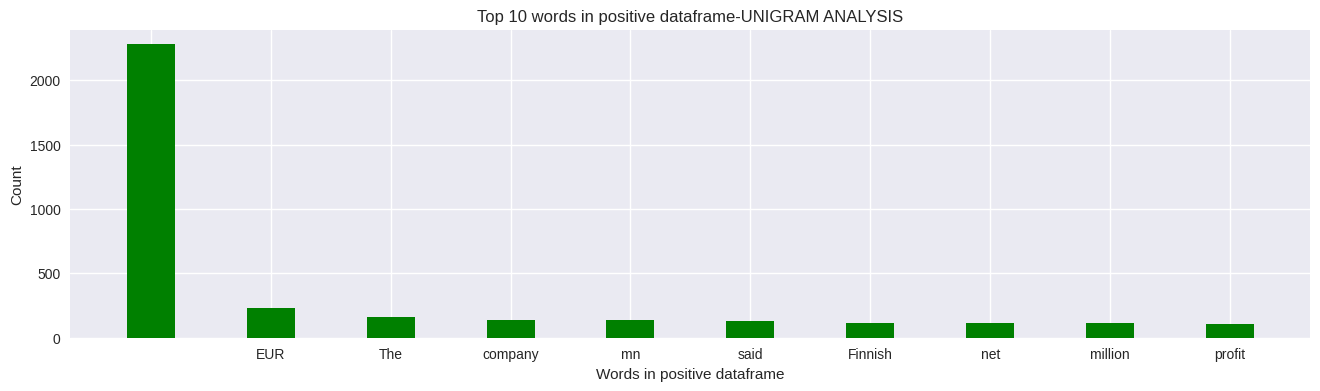

In [43]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]


plt.figure(1,figsize=(16,4))

plt.bar(pd1,pd2, color ='green',
        width = 0.4)

plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")

plt.savefig("positive-unigram.png")
plt.show()



In [44]:
df_positive.head(10)

,0,1
0,,2279
1,EUR,228
2,The,158
3,company,140
4,mn,135
5,said,132
6,Finnish,118
7,net,115
8,million,112
9,profit,110


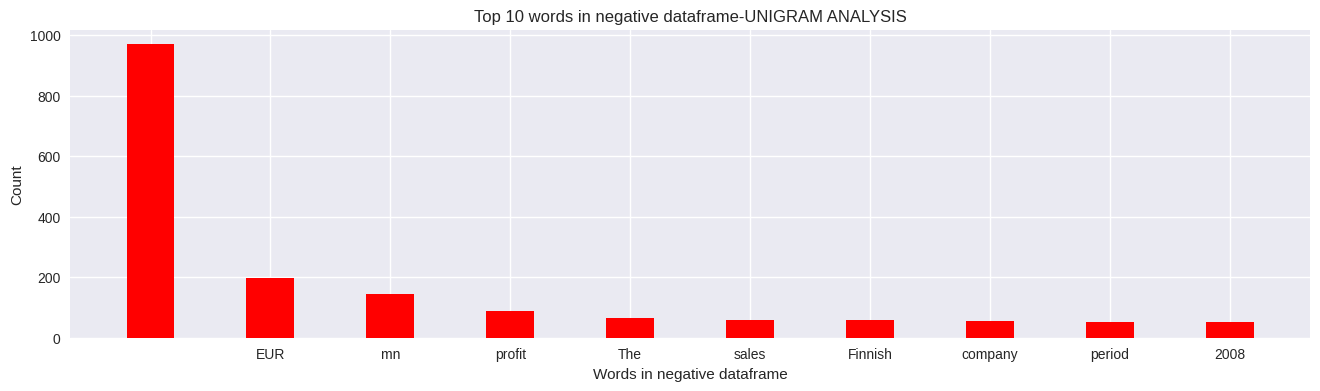

In [45]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1,ned2, color ='red',
        width = 0.4)

plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")

plt.savefig("negative-unigram.png")
plt.show()

In [46]:
df_negative.head(10)

,0,1
0,,969
1,EUR,197
2,mn,143
3,profit,89
4,The,65
5,sales,58
6,Finnish,58
7,company,56
8,period,51
9,2008,51


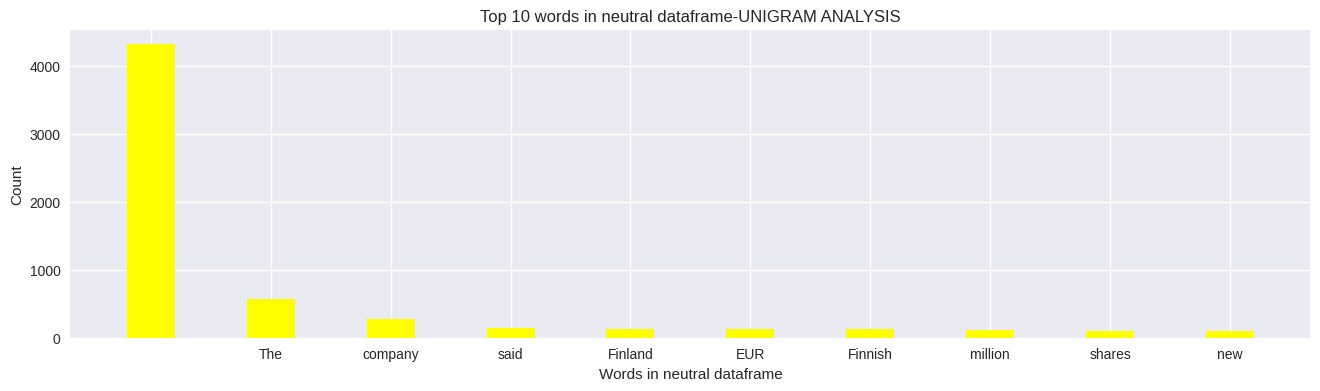

In [47]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)

plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")

plt.savefig("neutral-unigram.png")
plt.show()

In [48]:
df_neutral.head(10)

,0,1
0,,4323
1,The,569
2,company,280
3,said,146
4,Finland,129
5,EUR,128
6,Finnish,127
7,million,115
8,shares,104
9,new,93


# **Step 7: Creating Bigrams**
Repeat the same steps which we followed to analyze our data using unigrams, except that you have to pass parameter 2 while invoking the generate_N_grams() function. You can optionally consider changing the names of the data frames, which I have done.

In [49]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [50]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['Nokia', '012', 'pct', '1670', 'eur', 'kicking', 'morning', 'negative', 'territory', '']
Sentence after removing stopwords: ['Net', 'income', 'life', 'insurance', 'rose', 'EUR', '165', 'mn', 'EUR', '140', 'mn', '', 'net', 'income', 'nonlife', 'insurance', 'EUR', '226', 'mn', 'EUR', '152', 'mn', '2009', '']
Sentence after removing stopwords: ['In', 'China', '', 'Finnish', 'Kone', 'provides', 'elevators', '', 'escalators', '', 'solutions', 'modernisation', 'maintenance', 'build', '342', 'escalators', 'installed', 'highspeed', 'railway', 'section', 'Beijing', 'Shanghai', '15', 'years', '', 'time', '']
Sentence after removing stopwords: ['The', 'Helsinkibased', 'company', '', 'also', 'owns', 'Salomon', '', 'Atomic', 'Suunto', 'brands', '', 'said', 'net', 'profit', 'rose', '15', 'percent', 'three', 'months', 'Dec', '31', '', '', 'x20ac', '', '47', 'million', '', '', '61US', 'million', '', '', '', '', 'x20ac', '', '408', 'million', 'year', 'earlier', '']
S

In [51]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

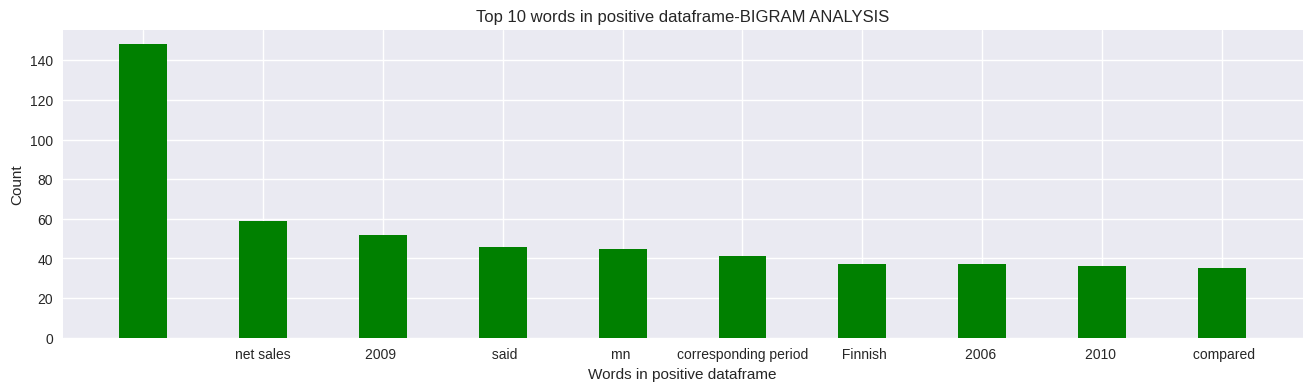

In [53]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',
        width = 0.4)

plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()



In [54]:
df_positive2.head(10)

,0,1
0,,148
1,net sales,59
2,2009,52
3,said,46
4,mn,45
5,corresponding period,41
6,Finnish,37
7,2006,37
8,2010,36
9,compared,35


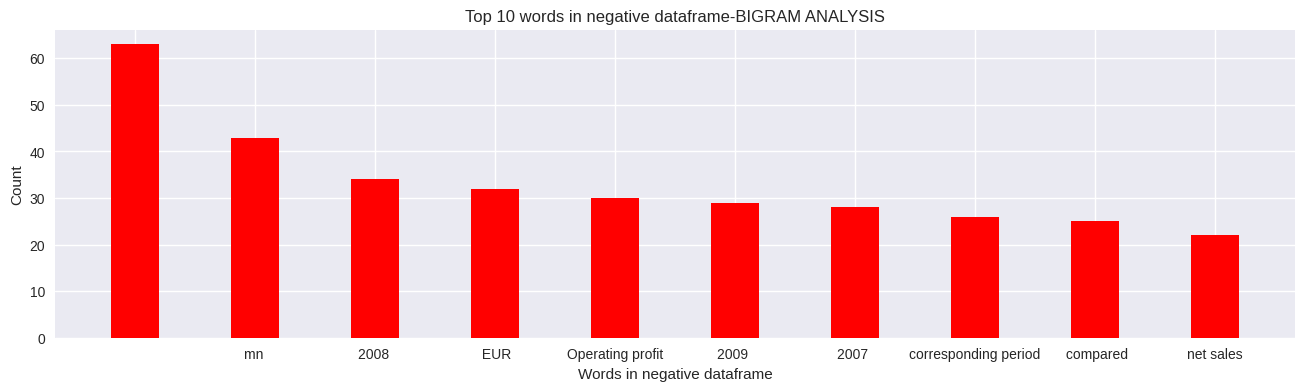

In [55]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)

plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")

plt.savefig("negative-bigram.png")
plt.show()

In [56]:
df_negative2.head(10)

,0,1
0,,63
1,mn,43
2,2008,34
3,EUR,32
4,Operating profit,30
5,2009,29
6,2007,28
7,corresponding period,26
8,compared,25
9,net sales,22


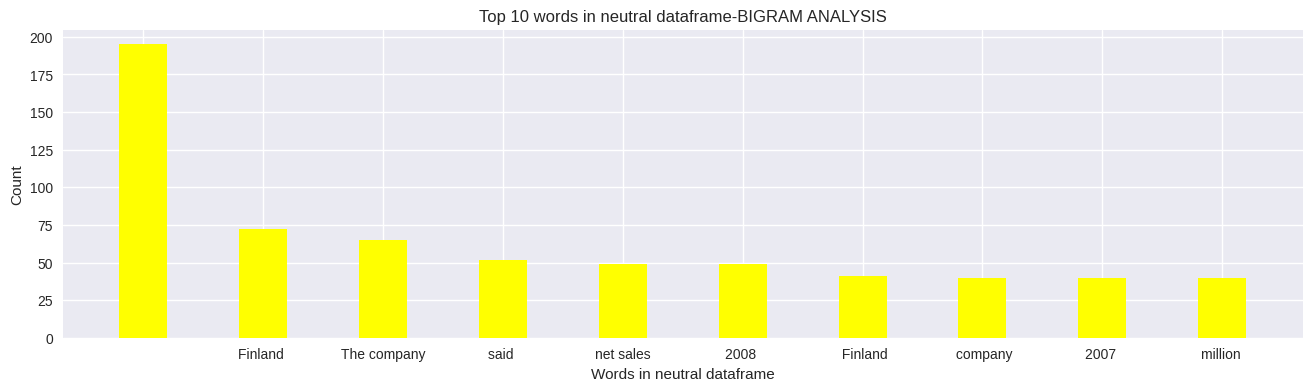

In [57]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)

plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")

plt.savefig("neutral-bigram.png")
plt.show()

In [58]:
df_neutral2.head(10)

,0,1
0,,195
1,Finland,72
2,The company,65
3,said,52
4,net sales,49
5,2008,49
6,Finland,41
7,company,40
8,2007,40
9,million,40


# **Step 8: Creating Trigrams**
Repeat the same steps which we followed to analyze our data using unigrams, except that you have to pass parameter 3 while invoking the generate_N_grams() function.

In [59]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [60]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1

Sentence after removing stopwords: ['Nokia', '012', 'pct', '1670', 'eur', 'kicking', 'morning', 'negative', 'territory', '']
Sentence after removing stopwords: ['Net', 'income', 'life', 'insurance', 'rose', 'EUR', '165', 'mn', 'EUR', '140', 'mn', '', 'net', 'income', 'nonlife', 'insurance', 'EUR', '226', 'mn', 'EUR', '152', 'mn', '2009', '']
Sentence after removing stopwords: ['In', 'China', '', 'Finnish', 'Kone', 'provides', 'elevators', '', 'escalators', '', 'solutions', 'modernisation', 'maintenance', 'build', '342', 'escalators', 'installed', 'highspeed', 'railway', 'section', 'Beijing', 'Shanghai', '15', 'years', '', 'time', '']
Sentence after removing stopwords: ['The', 'Helsinkibased', 'company', '', 'also', 'owns', 'Salomon', '', 'Atomic', 'Suunto', 'brands', '', 'said', 'net', 'profit', 'rose', '15', 'percent', 'three', 'months', 'Dec', '31', '', '', 'x20ac', '', '47', 'million', '', '', '61US', 'million', '', '', '', '', 'x20ac', '', '408', 'million', 'year', 'earlier', '']
S

In [61]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

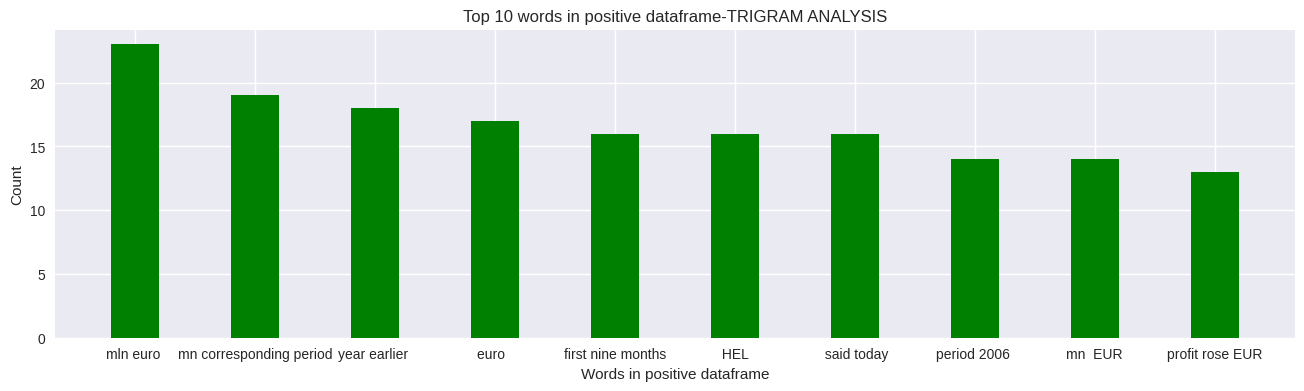

In [62]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)

plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")

plt.savefig("positive-trigram.png")
plt.show()



In [63]:
df_positive3.head(10)

,0,1
0,mln euro,23
1,mn corresponding period,19
2,year earlier,18
3,euro,17
4,first nine months,16
5,HEL,16
6,said today,16
7,period 2006,14
8,mn EUR,14
9,profit rose EUR,13


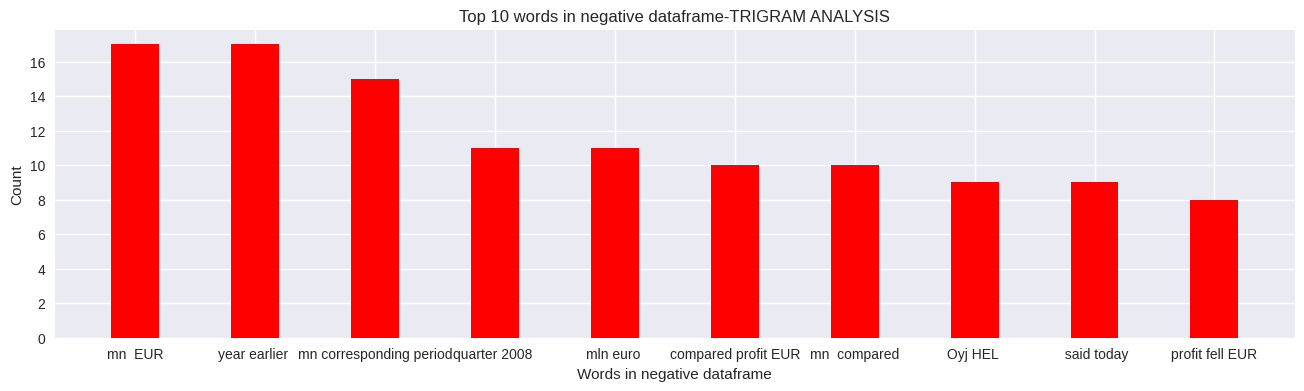

In [64]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4)

plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")

plt.savefig("negative-trigram.png")
plt.show()

In [65]:
df_negative3.head(10)

,0,1
0,mn EUR,17
1,year earlier,17
2,mn corresponding period,15
3,quarter 2008,11
4,mln euro,11
5,compared profit EUR,10
6,mn compared,10
7,Oyj HEL,9
8,said today,9
9,profit fell EUR,8


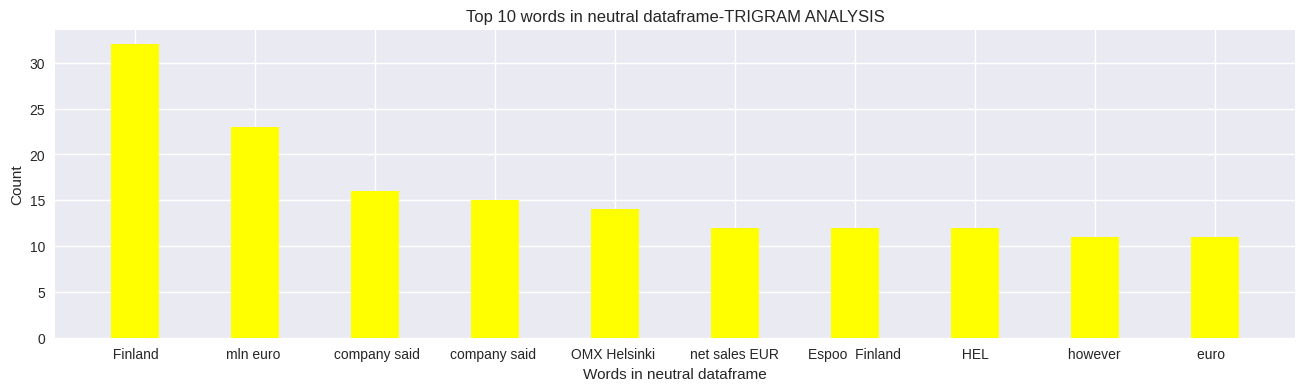

In [66]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4)

plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")

plt.savefig("neutral-trigram.png")
plt.show()

In [ ]:
df_neutral3.head(10)

,0,1
0,mln euro,19
1,Finland,14
2,euro,13
3,HEL,13
4,company said,13
5,company said,12
6,Inc,10
7,however,10
8,OMX Helsinki,9
9,Oyj HEL,9


# **Results of the Model**
From the above graphs, we can conclude that trigrams perform the best on our train data. This is because it provides more useful words frequently, such as profit rose EUR, a year earlier for the positive data frame, corresponding period, period 2007, names of companies such as HEL for the negative data frame and Finland, the company said and again names of companies such as HEL, OMX Helsinki and so on for the neutral data frame.

**Conclusion**
Therefore, n-grams are one of the most powerful techniques for extracting features from the text while working on a text problem. You can find the entire code here. In this blog, we have successfully learned what n-grams are and how we can generate n-grams for a given text dataset easily in Python. We also understood the applications of n-grams in NLP and generated n-grams in the case study of sentiment analysis.

**Key Takeaways**

N-grams are the most powerful technique to extract the features from the text.
N-grams have a wide range of applications in language models, spelling correctors, text classification problems, and more.